In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [4]:
GeneriqueCompte=pd.read_table('GeneriqueComptes_New.txt', sep=",",index_col=0)
GeneriqueCompte.head()

C:\Users\SL-WASSIM\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


,GCO_CodSociete,GCO_CodPrestataire,GCO_CodCompte,GCO_CodTypeOrientation,GCO_IsOuvert,GCO_IsAsv,GCO_IsAssureur,GCO_IsPea,GCO_IsPeaPme,GCO_CodProduit,...,GCO_CodObjectifPlacementMif2,GCO_CodTypeDistributionMif2,GCO_CodProfilRisqueMif2,GCO_CodStrategieInvestissementMif2,GCO_AllocationActionMinMif2,GCO_AllocationActionMaxMif2,GCO_CodTarif,GCO_CodTarifDDG,GCO_CodTarifFHG,GCO_IsNanti
0,OBP,Generali Patrimoine,0x6451CED2D329C6EE21BDDF0A8B291F56,W,1,0,1,0,0.0,004,...,1.0,0.0,1.0,1.0,30.0,70.0,BPAL,30-1,32-1,0
1,OBP,Axa,0x72DE8FA9B6E81B0758E5A9422C6D02A8,W,1,0,1,0,0.0,100,...,1.0,0.0,1.0,1.0,30.0,70.0,BPAL,30-1,32-1,0
2,OBP,Axa,0xD805A06CAECAE34E4A738DC4F62A8631,W,1,0,1,0,0.0,100,...,1.0,0.0,1.0,1.0,30.0,70.0,BPAL,30-1,32-1,0
3,OBP,Axa,0x5664E99D4B8BC50D3F454F8BDD009A99,W,1,0,1,0,0.0,100,...,1.0,0.0,1.0,1.0,30.0,70.0,BPAL,30-1,32-1,0
4,OBP,Axa,0x9A4A833DEC7FA1A5BF9AFD45A08987AE,W,1,0,1,0,0.0,100,...,1.0,0.0,1.0,1.0,30.0,70.0,BPAL,30-1,32-1,0


In [3]:
GeneriqueCompte.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60660 entries, 0 to 60659
Data columns (total 30 columns):
GCO_CodSociete                        60660 non-null object
GCO_CodPrestataire                    60660 non-null object
GCO_CodCompte                         60660 non-null object
GCO_CodTypeOrientation                60660 non-null object
GCO_IsOuvert                          60660 non-null int64
GCO_IsAsv                             60660 non-null int64
GCO_IsAssureur                        60660 non-null int64
GCO_IsPea                             60660 non-null int64
GCO_IsPeaPme                          60660 non-null float64
GCO_CodProduit                        60660 non-null object
GCO_LibProduit                        60660 non-null object
GCO_TypGestion                        60660 non-null object
GCO_LibEtatCompte                     60660 non-null object
GCO_CodTypContrat                     60660 non-null object
GCO_CodEnveloppeFiscale               60660 non-null o

#### Encodage de la colonne GCO_CodTypContrat

In [4]:
GeneriqueCompte.GCO_CodTypContrat.unique()

array(['ASV', 'CON', 'PEA', 'SCAALZ', 'PEAPME'], dtype=object)

In [5]:

from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
matrix = onehotencoder.fit_transform(GeneriqueCompte["GCO_CodTypContrat"].values.reshape(-1,1)).toarray()
data2=pd.DataFrame(matrix, columns=('ASV', 'CON', 'PEA', 'SCAALZ', 'PEAPME'))
data3=GeneriqueCompte.drop(columns=["GCO_CodTypContrat"])
data4=pd.concat([data3,data2],axis=1)
GeneriqueCompte=data4

In [6]:
GeneriqueCompte.head()

,GCO_CodSociete,GCO_CodPrestataire,GCO_CodCompte,GCO_CodTypeOrientation,GCO_IsOuvert,GCO_IsAsv,GCO_IsAssureur,GCO_IsPea,GCO_IsPeaPme,GCO_CodProduit,...,GCO_AllocationActionMaxMif2,GCO_CodTarif,GCO_CodTarifDDG,GCO_CodTarifFHG,GCO_IsNanti,ASV,CON,PEA,SCAALZ,PEAPME
0,OBP,Generali Patrimoine,0x6451CED2D329C6EE21BDDF0A8B291F56,W,1,0,1,0,0.0,004,...,70.0,BPAL,30-1,32-1,0,1.0,0.0,0.0,0.0,0.0
1,OBP,Axa,0x72DE8FA9B6E81B0758E5A9422C6D02A8,W,1,0,1,0,0.0,100,...,70.0,BPAL,30-1,32-1,0,1.0,0.0,0.0,0.0,0.0
2,OBP,Axa,0xD805A06CAECAE34E4A738DC4F62A8631,W,1,0,1,0,0.0,100,...,70.0,BPAL,30-1,32-1,0,1.0,0.0,0.0,0.0,0.0
3,OBP,Axa,0x5664E99D4B8BC50D3F454F8BDD009A99,W,1,0,1,0,0.0,100,...,70.0,BPAL,30-1,32-1,0,1.0,0.0,0.0,0.0,0.0
4,OBP,Axa,0x9A4A833DEC7FA1A5BF9AFD45A08987AE,W,1,0,1,0,0.0,100,...,70.0,BPAL,30-1,32-1,0,1.0,0.0,0.0,0.0,0.0


In [7]:
GeneriqueCompte.columns

Index(['GCO_CodSociete', 'GCO_CodPrestataire', 'GCO_CodCompte',
       'GCO_CodTypeOrientation', 'GCO_IsOuvert', 'GCO_IsAsv', 'GCO_IsAssureur',
       'GCO_IsPea', 'GCO_IsPeaPme', 'GCO_CodProduit', 'GCO_LibProduit',
       'GCO_TypGestion', 'GCO_LibEtatCompte', 'GCO_CodEnveloppeFiscale',
       'GCO_CodTribu', 'GCO_CodCapaciteSupportPertesMif2',
       'GCO_CodProfilInvestissementMif2', 'GCO_CodToleranceRisqueMif2',
       'GCO_CodHorizonPlacementMif2', 'GCO_CodObjectifPlacementMif2',
       'GCO_CodTypeDistributionMif2', 'GCO_CodProfilRisqueMif2',
       'GCO_CodStrategieInvestissementMif2', 'GCO_AllocationActionMinMif2',
       'GCO_AllocationActionMaxMif2', 'GCO_CodTarif', 'GCO_CodTarifDDG',
       'GCO_CodTarifFHG', 'GCO_IsNanti', 'ASV', 'CON', 'PEA', 'SCAALZ',
       'PEAPME'],
      dtype='object')

#### Encodage de la colonne GCO_LibEtatCompte

In [7]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
etat_enc = label_enc.fit_transform(GeneriqueCompte["GCO_LibEtatCompte"].values)
etat = np.array(GeneriqueCompte.GCO_LibEtatCompte)
GeneriqueCompte.GCO_LibEtatCompte = etat_enc

In [8]:
GeneriqueCompte=GeneriqueCompte.drop(columns=['GCO_CodTarif','GCO_CodTarifDDG','GCO_CodTarifFHG','GCO_CodSociete','GCO_CodPrestataire','GCO_CodCompte','GCO_CodProduit','GCO_LibProduit','GCO_TypGestion','GCO_CodEnveloppeFiscale','GCO_CodTribu','GCO_CodTypeOrientation'])

In [48]:
GeneriqueCompte.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60660 entries, 0 to 60659
Data columns (total 22 columns):
GCO_IsOuvert                          60660 non-null int64
GCO_IsAsv                             60660 non-null int64
GCO_IsAssureur                        60660 non-null int64
GCO_IsPea                             60660 non-null int64
GCO_IsPeaPme                          60660 non-null float64
GCO_LibEtatCompte                     60660 non-null int32
GCO_CodCapaciteSupportPertesMif2      60660 non-null float64
GCO_CodProfilInvestissementMif2       60660 non-null float64
GCO_CodToleranceRisqueMif2            60660 non-null float64
GCO_CodHorizonPlacementMif2           60660 non-null float64
GCO_CodObjectifPlacementMif2          60660 non-null float64
GCO_CodTypeDistributionMif2           60660 non-null float64
GCO_CodProfilRisqueMif2               60660 non-null float64
GCO_CodStrategieInvestissementMif2    60660 non-null float64
GCO_AllocationActionMinMif2           60660 non

## Prédiction de la Capacité du client à tolérer le risque de perte financière

In [9]:
y=GeneriqueCompte.iloc[:,8]
X=GeneriqueCompte.iloc[:,[0,1,2,3,4,5,6,7,9,10,11,12,13,14,15,16,17,18,19,20,21]].values

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Arbre de décision 

In [11]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc_model = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_dtc = dtc_model.predict(X_test)

In [12]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(accuracy_score(y_test, y_pred_dtc))
print(confusion_matrix(y_test, y_pred_dtc))
print(classification_report(y_test, y_pred_dtc))

0.9699307616221563
[[ 2142     2     1     0     0]
 [    3 10488    17     4     0]
 [    1    62   822    42     1]
 [    1     2    91  1253    11]
 [    0     0    15   203     4]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2145
         1.0       0.99      1.00      1.00     10512
         3.0       0.87      0.89      0.88       928
         5.0       0.83      0.92      0.88      1358
         7.0       0.25      0.02      0.03       222

   micro avg       0.97      0.97      0.97     15165
   macro avg       0.79      0.76      0.76     15165
weighted avg       0.96      0.97      0.96     15165



### Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_train, y_train)
y_pred_rfc = rfc_model.predict(X_test)

C:\Users\SL-WASSIM\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [14]:
print(accuracy_score(y_test, y_pred_rfc))
print(classification_report(y_test, y_pred_rfc))
print(confusion_matrix(y_test, y_pred_rfc))

0.9683481701285855
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2145
         1.0       0.99      1.00      1.00     10512
         3.0       0.88      0.86      0.87       928
         5.0       0.82      0.93      0.87      1358
         7.0       0.22      0.03      0.05       222

   micro avg       0.97      0.97      0.97     15165
   macro avg       0.78      0.76      0.76     15165
weighted avg       0.96      0.97      0.96     15165

[[ 2140     3     2     0     0]
 [    3 10479    27     3     0]
 [    0    60   796    72     0]
 [    1     3    69  1264    21]
 [    0     0    14   202     6]]


### KNN

Text(0, 0.5, 'Erreur')

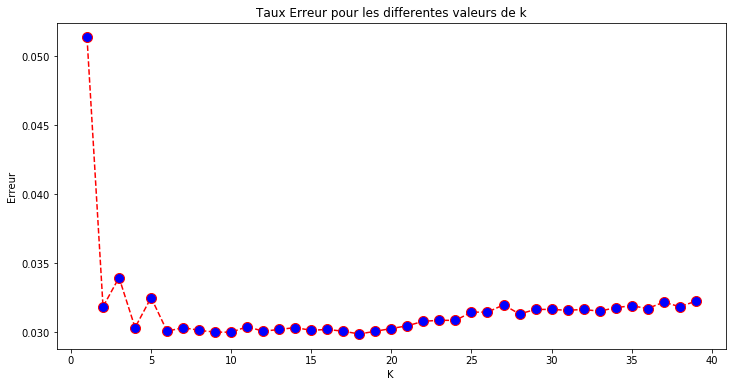

In [18]:
from sklearn.neighbors import KNeighborsClassifier
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(6)#si on veut utiliser la distance manhattan donc:metric='manhattan'
knn_model = knn.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [20]:
print(accuracy_score(y_test,y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

0.9699307616221563
[[ 2138     6     0     1     0]
 [    3 10490    17     2     0]
 [    0    66   825    37     0]
 [    3     5    91  1250     9]
 [    1     0    12   203     6]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2145
         1.0       0.99      1.00      1.00     10512
         3.0       0.87      0.89      0.88       928
         5.0       0.84      0.92      0.88      1358
         7.0       0.40      0.03      0.05       222

   micro avg       0.97      0.97      0.97     15165
   macro avg       0.82      0.77      0.76     15165
weighted avg       0.96      0.97      0.96     15165



### Courbe ROC

In [22]:
proba_tree = dtc_model.predict_proba(X_test)
proba_knn  = knn_model.predict_proba(X_test)
proba_Rf  = rfc_model.predict_proba(X_test)

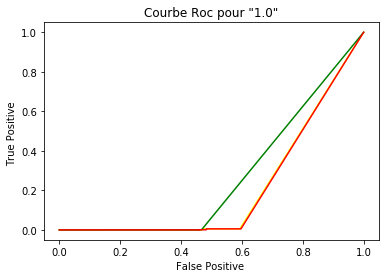

In [37]:
from sklearn import metrics
preds_tree = proba_tree[:,0]
preds_knn  = proba_knn[:,0]
preds_Rf   = proba_Rf[:,0]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds_knn, pos_label=1.0)
fprr, tprr, threshold = metrics.roc_curve(y_test, preds_tree, pos_label=1.0)
fprrr, tprrr, threshold = metrics.roc_curve(y_test, preds_Rf, pos_label=1.0)
import matplotlib.pyplot as plt
plt.title('Courbe Roc pour "1.0"')
plt.plot(fprr,tprr ,color='yellow')
plt.plot(fpr,tpr,color='green')
plt.plot(fprrr,tprrr, color='red')
plt.ylabel('True Positive ')
plt.xlabel('False Positive ')
plt.show()

## Prédiction si le compte est nanti

In [24]:
y_nanti=GeneriqueCompte.iloc[:,16]
X_nanti=GeneriqueCompte.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,19,20,21]].values
y.unique()

array([1., 5., 0., 3., 7.])

In [25]:
from sklearn.model_selection import train_test_split
X_train_nanti, X_test_nanti, y_train_nanti, y_test_nanti = train_test_split(X_nanti, y_nanti, random_state=0)

### Arbre de décision 

In [26]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc_model_nanti = DecisionTreeClassifier().fit(X_train_nanti, y_train_nanti)
y_pred_nanti_dtc = dtc_model_nanti.predict(X_test_nanti)

In [27]:
print(accuracy_score(y_test_nanti, y_pred_nanti_dtc))
print(confusion_matrix(y_test_nanti, y_pred_nanti_dtc))
print(classification_report(y_test_nanti, y_pred_nanti_dtc))

0.9999340586877679
[[15033     1]
 [    0   131]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15034
           1       0.99      1.00      1.00       131

   micro avg       1.00      1.00      1.00     15165
   macro avg       1.00      1.00      1.00     15165
weighted avg       1.00      1.00      1.00     15165



### Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc_model_nanti = rfc.fit(X_train_nanti, y_train_nanti)
y_pred_nanti_rfc = rfc_model_nanti.predict(X_test_nanti)

C:\Users\SL-WASSIM\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [31]:
print(accuracy_score(y_test_nanti, y_pred_nanti_rfc))
print(classification_report(y_test_nanti, y_pred_nanti_rfc))
print(confusion_matrix(y_test_nanti, y_pred_nanti_rfc))

0.9990108803165183
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15034
           1       0.91      0.98      0.94       131

   micro avg       1.00      1.00      1.00     15165
   macro avg       0.96      0.99      0.97     15165
weighted avg       1.00      1.00      1.00     15165

[[15022    12]
 [    3   128]]


### KNN

Text(0, 0.5, 'Erreur')

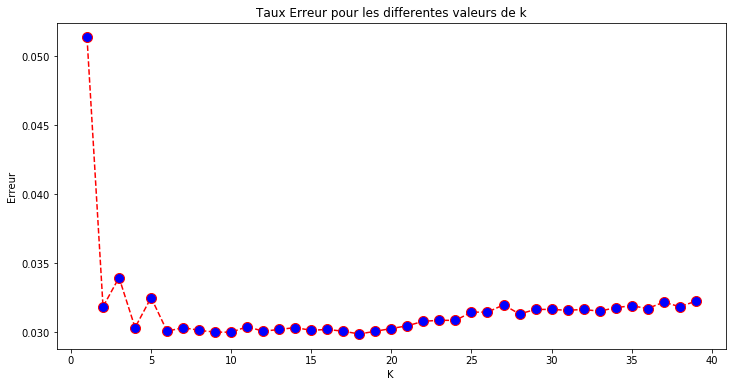

In [32]:
from sklearn.neighbors import KNeighborsClassifier
error_nanti = []
for i in range(1, 40):
    knn_nanti = KNeighborsClassifier(i)
    knn_model_nanti = knn_nanti.fit(X_train_nanti, y_train_nanti)
    pred_i_nanti = knn_model_nanti.predict(X_test_nanti)
    error_nanti.append(np.mean(pred_i_nanti != y_test_nanti))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(6)#si on veut utiliser la distance manhattan donc:metric='manhattan'
knn_model_nanti = knn.fit(X_train_nanti, y_train_nanti)
y_pred_nanti_knn = knn_model_nanti.predict(X_test_nanti)

In [34]:
print(accuracy_score(y_test_nanti,y_pred_nanti_knn))
print(confusion_matrix(y_test_nanti, y_pred_nanti_knn))
print(classification_report(y_test_nanti, y_pred_nanti_knn))

0.9986811737553577
[[15028     6]
 [   14   117]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15034
           1       0.95      0.89      0.92       131

   micro avg       1.00      1.00      1.00     15165
   macro avg       0.98      0.95      0.96     15165
weighted avg       1.00      1.00      1.00     15165



### Courbe ROC

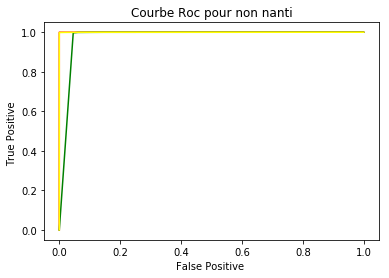

In [35]:
proba_tree_nanti = dtc_model_nanti.predict_proba(X_test_nanti)
proba_knn_nanti  = knn_model_nanti.predict_proba(X_test_nanti)
proba_Rf_nanti  = rfc_model_nanti.predict_proba(X_test_nanti)
from sklearn import metrics
preds_tree_nanti = proba_tree_nanti[:,0]
preds_knn_nanti  = proba_knn_nanti[:,0]
preds_Rf_nanti   = proba_Rf_nanti[:,0]
fpr_nanti, tpr_nanti, threshold = metrics.roc_curve(y_test_nanti, preds_knn_nanti, pos_label=0)
fprr_nanti, tprr_nanti, threshold = metrics.roc_curve(y_test_nanti, preds_tree_nanti, pos_label=0)
fprrr_nanti, tprrr_nanti, threshold = metrics.roc_curve(y_test_nanti, preds_Rf_nanti, pos_label=0)
import matplotlib.pyplot as plt
plt.title('Courbe Roc pour non nanti')
plt.plot(fprr_nanti,tprr_nanti, color='red')
plt.plot(fpr_nanti,tpr_nanti, color='green')
plt.plot(fprrr_nanti,tprrr_nanti,color='yellow')
plt.ylabel('True Positive ')
plt.xlabel('False Positive ')
plt.show()